# Week 2 Spatial Data Exploration 
## Meaghan Woody
## UP 221 W24

### The dataset used here explored low access to grocery stores in LA by GEOID. We looked at the variables, how the values were reported, and evaluated the observations by year.

In [7]:
# Importing the libraries
import pandas as pd
import numpy as np
import geopandas as gpd 

In [8]:
# Importing dataset
grocery=gpd.read_file ('data/All Years Grocery Store Access Calculations.csv')
grocery

,geoid,geoid20,year,denom_total_pop,lowaccess_count,lowaccess_li_count,lowaccess_kids_count,lowaccess_seniors_count,geometry
0,1400000US06037101110,6037101110,2019,4731,115,37,18,12,None
1,1400000US06037101122,6037101122,2019,3664,1704,137,292,260,None
2,1400000US06037101220,6037101220,2019,3363,0,0,0,0,None
3,1400000US06037101221,6037101221,2019,3260,0,0,0,0,None
4,1400000US06037101222,6037101222,2019,2730,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...
4983,1400000US06037980035,6037980035,2015,6728,377,150,110,26,None
4984,1400000US06037980036,6037980036,2015,7785,1835,647,406,243,None
4985,1400000US06037980037,6037980037,2015,2786,0,0,0,0,None
4986,1400000US06037980038,6037980038,2015,5199,55,3,10,15,None


In [ ]:
# To explore the data, we will use a set of commands and run a query.
# .shape
# .info
# .head()
# .value_counts()
# .plot()
# run a query to filter data

In [45]:
grocery.shape

# .shape shows us there are 4988 rows and 9 columns

(4988, 9)

In [46]:
grocery.info

# this is allowing us to look at the first 5 and last 5 observations for the 9 variables to see what the values look like

<bound method DataFrame.info of                      geoid     geoid20  year denom_total_pop lowaccess_count  \
0     1400000US06037101110  6037101110  2019            4731             115   
1     1400000US06037101122  6037101122  2019            3664            1704   
2     1400000US06037101220  6037101220  2019            3363               0   
3     1400000US06037101221  6037101221  2019            3260               0   
4     1400000US06037101222  6037101222  2019            2730               0   
...                    ...         ...   ...             ...             ...   
4983  1400000US06037980035  6037980035  2015            6728             377   
4984  1400000US06037980036  6037980036  2015            7785            1835   
4985  1400000US06037980037  6037980037  2015            2786               0   
4986  1400000US06037980038  6037980038  2015            5199              55   
4987  1400000US06037980039  6037980039  2015             157              62   

     lo

In [47]:
grocery.head(5)

# .head allows us to look at a few observations at a time, here we print the first 5

,geoid,geoid20,year,denom_total_pop,lowaccess_count,lowaccess_li_count,lowaccess_kids_count,lowaccess_seniors_count,geometry
0,1400000US06037101110,6037101110,2019,4731,115,37,18,12,None
1,1400000US06037101122,6037101122,2019,3664,1704,137,292,260,None
2,1400000US06037101220,6037101220,2019,3363,0,0,0,0,None
3,1400000US06037101221,6037101221,2019,3260,0,0,0,0,None
4,1400000US06037101222,6037101222,2019,2730,0,0,0,0,None


In [94]:
# I want to create a graph the data separated by year
# We need to prep the variables for plotting

# get values for a single column
grocery['year'].sample(5)

# save it as a variable
year = grocery['year'].value_counts()

# convert the series into a dataframe
year = year.reset_index()

# current columns as a list
year.columns.to_list()

['year', 'count']

<Axes: title={'center': 'Number of obersavations per year'}, xlabel='year'>

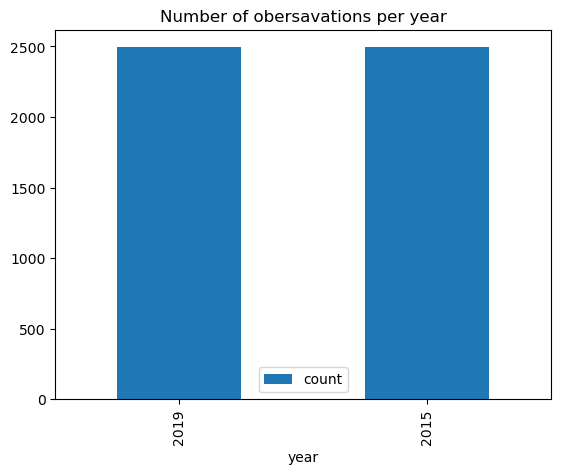

In [95]:
# We can see the graph for the amount of observations that are recorded by each year.
# This is not very informative for our variables but it shows us that the same number of GEOIDs were sampled in 2019 and 2015

year.plot.bar(x = 'year', y = 'count', title = 'Number of observations per year')


In [113]:
# Lastly we will run a query to filter through our data
# filter the dataset to only show low access, low income & low access, and year
# our geometry is labeled as "None" for each obs so we cannot explore mapping given the commands learned this week

# dataframe original variable names and types
grocery.info()

# dataframe with a subset of columns
desired_columns = ['year','lowaccess_count','lowaccess_li_count']
grocery[desired_columns].sample(5)

grocery_trimmed = grocery[desired_columns].copy()
grocery_trimmed

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   geoid                    4988 non-null   object  
 1   geoid20                  4988 non-null   object  
 2   year                     4988 non-null   object  
 3   denom_total_pop          4988 non-null   object  
 4   lowaccess_count          4988 non-null   object  
 5   lowaccess_li_count       4988 non-null   object  
 6   lowaccess_kids_count     4988 non-null   object  
 7   lowaccess_seniors_count  4988 non-null   object  
 8   geometry                 0 non-null      geometry
dtypes: geometry(1), object(8)
memory usage: 350.8+ KB


,year,lowaccess_count,lowaccess_li_count
0,2019,115,37
1,2019,1704,137
2,2019,0,0
3,2019,0,0
4,2019,0,0
...,...,...,...
4983,2015,377,150
4984,2015,1835,647
4985,2015,0,0
4986,2015,55,3


0       None
1       None
2       None
3       None
4       None
        ... 
4983    None
4984    None
4985    None
4986    None
4987    None
Name: geometry, Length: 4988, dtype: geometry